# OUTLIERS

# WHAT IS IT?

- Outliers are points from the data in which your value is not common, and your distance from the others is higher or lower then the others.
- They are problematic, because can cause tests to either miss significant findings or distort real results
- There is no way to define outliers (strict way)

# PROCESSES CAN GENERATE OUTLIERS

## Data Entry and Measurement Errors and Outliers

- If you determine an outlier value is an error, correct the value when possible
- If that's not possible, you must delete the data point because you know it's an incorrect value
- **Example:** Measurements of the population age

| Number | Age |
| :---: | :---: |
| 1 | 12 |
| 2 | 54 |
| 3 | 22 |
| ... | ... |
| **i** | **178** |
| ... | ... |
| n | 32 |

- i = 178? or 17? or 78? ... 

## Sampling Problems can cause Outliers

- Inferential Statistics use samples to draw conclusions about a specific population. Your study might accidentally obtain an item or person that is not from the target population
- If you can estabilish that an item or person does not represent your target population, you can remove that data point, in this case you must be able to atrribute a specific cause or reason for why that sample item does not fit your target population
- **Example:** A restaurant company founded in 2019 takes sales data restaurant company founded in 2016~2022 takes sales data

| Year | Sales |
| :---: | :---: |
| 2016 | R\$ 50.000,00 |
| 2017 | R\$ 55.000,00 |
| 2018 | R\$ 63.200,00 |
| 2019 | R\$ 67.680,00 |
| **2020** | **R\$ 10.000,00** |
| **2021** | **R\$ 25.000,00** |
| 2022 | R\$ 60.200,00 |
| 2023 | R\$ 75.400,00 |
| 2024 | R\$ 84.780,10 |


Because of the [Covid 19](https://en.wikipedia.org/wiki/COVID-19https://en.wikipedia.org/wiki/COVID-19), the restaurant shows sales of 10.000,00 and 25.000,00 for the years 2020 and 2021, respectively.

## Natural Variation causing an Outliers

- All data distributions have a spread of values. Extreme values can occur, but they have lower probabilities
- It's a bad practice to remove data points simply to produce a better fitting model or statistically significant results (you are forcing the subject area to appear less variable than it is in reality)
- **Example:** Dog size

| Id | Length (m) |
| :---: | :---: |
| 1 | 0.5 |
| 2 | 0.4 |
| 3 | 0.5 |
| 4 | 0.6 |
| ... | ... |
| **i** | **2.5** |
| ... | ... |
| **j** | **0.2** |
| ... | ... |
| n | 0.55 |

- The variance is high, but this doesn't mean we need to remove the outliers

# OUTLIERS DETECTION

1. Plot scatter
2. Histograms
3. Boxbox plot (IQR)
4. Z-score
5. Grubbs' test
6. Prophets (Time-Series)

## Plot Scatter

See the outliers of manual way

In [43]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from prophet import Prophet
import altair as alt

rcParams['figure.figsize'] = (13, 8)

In [4]:
df = pd.read_csv("example_outliers.csv", sep=",", encoding="utf-8")
df.head(10)

,ds,y
0,2008-01-30,5.976351
1,2008-01-16,6.049733
2,2008-01-17,6.011267
3,2008-01-14,5.953243
4,2008-01-15,5.910797
5,2008-01-12,5.407172
6,2008-01-13,5.323010
7,2008-01-10,5.880533
8,2008-01-11,5.645447
9,2008-01-18,5.958425


In [5]:
df["ds"] = pd.to_datetime(df["ds"], yearfirst=True)
df.head()

,ds,y
0,2008-01-30,5.976351
1,2008-01-16,6.049733
2,2008-01-17,6.011267
3,2008-01-14,5.953243
4,2008-01-15,5.910797


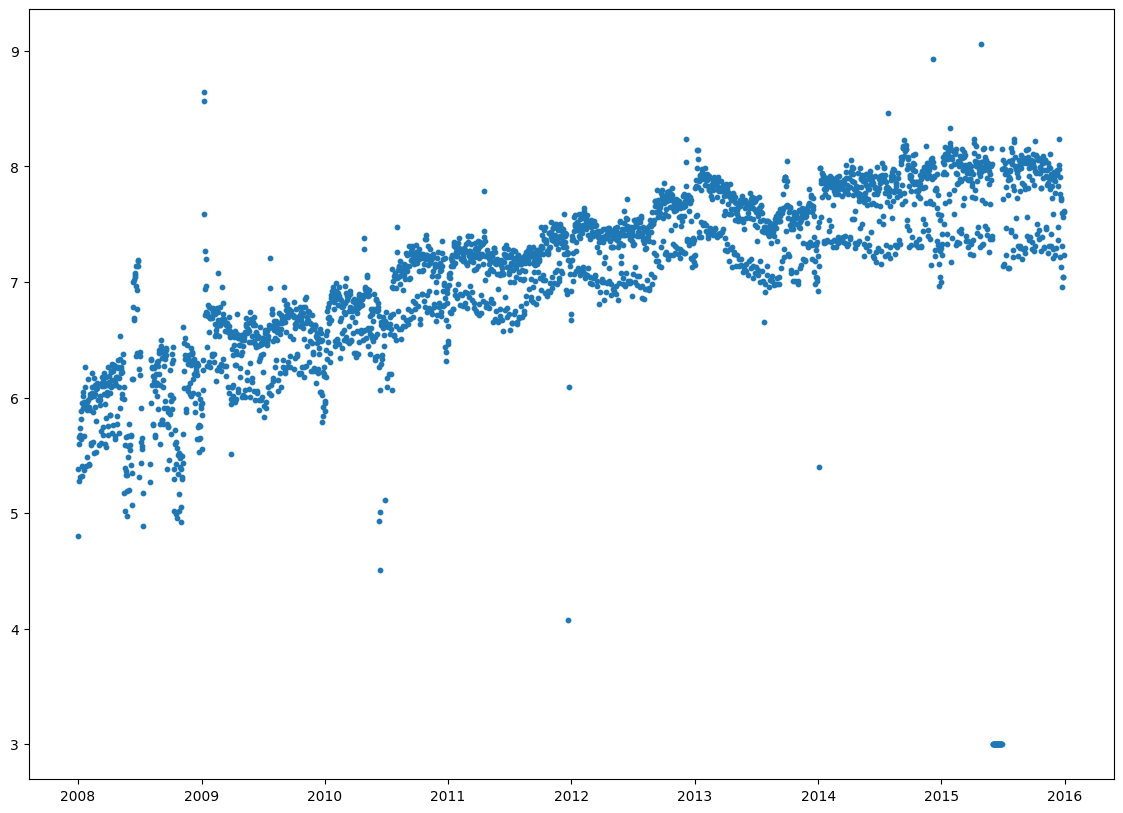

In [6]:
plt.scatter(df.ds, df.y, s=10)

## Histograms

Check the values' frequency and see values not usual or distant

array([[<AxesSubplot: title={'center': 'y'}>]], dtype=object)

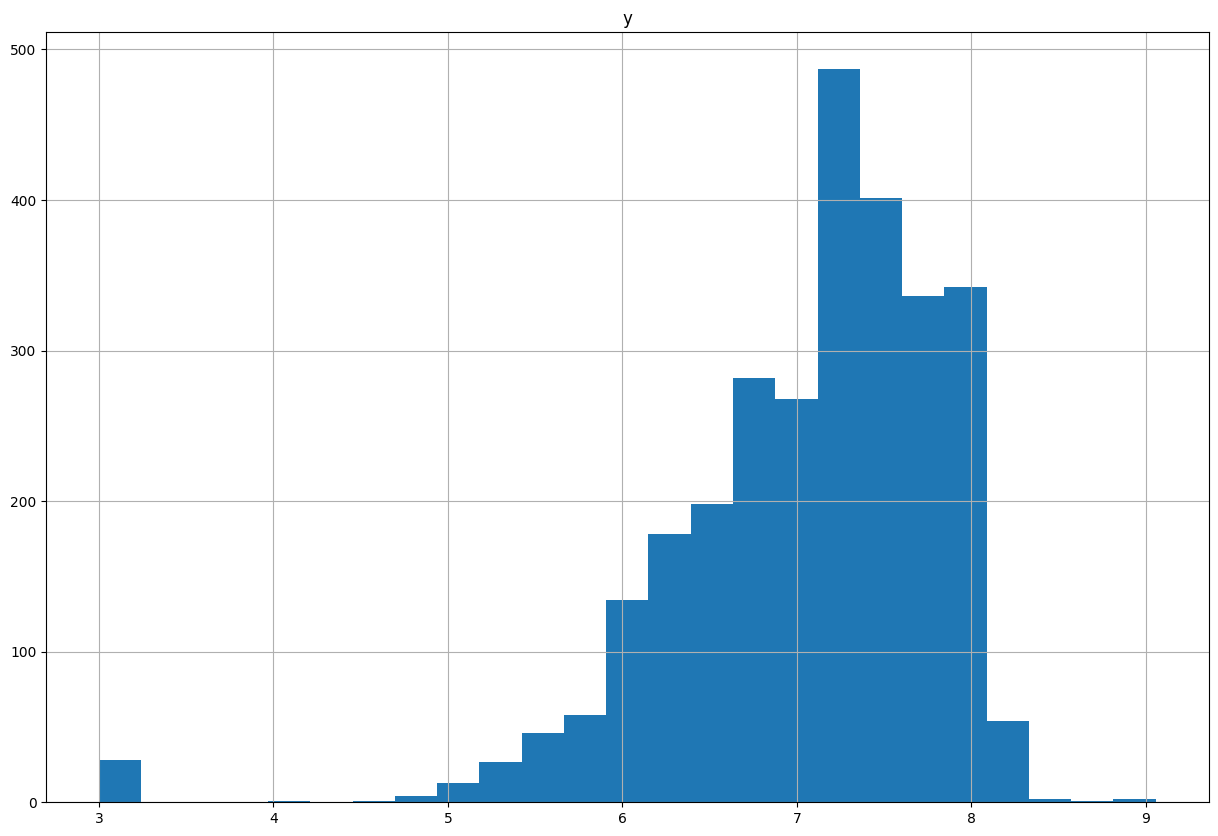

In [7]:
df.hist(column="y", figsize=(15, 10), bins=25)

## Box Plot

1. Compute $\mathrm{QI}$ (quantile 0.25) and $\mathrm{QIII}$ (quantile 0.75)
2. $\mathrm{IQR} = \mathrm{QIII} - \mathrm{QI}$
3. Compute the $\mathrm{inner\_lower\_bound} = \mathrm{QI} - 1.5 \times \mathrm{IQR}$
4. Compute the $\mathrm{inner\_upper\_bound} = \mathrm{QIII} + 1.5 \times \mathrm{IQR}$
5. Compute the $\mathrm{outer\_lower\_bound} = \mathrm{QI} - 3.0 \times \mathrm{IQR}$ 
6. Compute the $\mathrm{outer\_upper\_bound} = \mathrm{QIII} + 3.0 \times \mathrm{IQR}$
7. If falls outside the lower/upper **inner** bound is considered **outlier**
8. If falls outsite the lower/upper **outer** bound is a major **extreme outlier**

<div>
<img src="src/boxplot.png" width="500"/>
</div>

<AxesSubplot: >

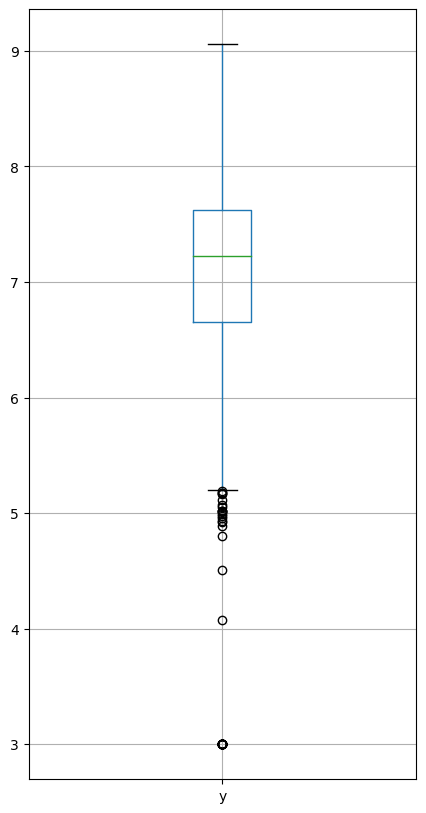

In [8]:
df.boxplot(column="y", figsize=(5, 10))

In [9]:
quantile_25 = np.quantile(df.y, 0.25)
quantile_75 = np.quantile(df.y, 0.75)
IQR = quantile_75 - quantile_25
inner_lower_bound = quantile_25 - 1.5*IQR
inner_upper_bound = quantile_75 + 1.5*IQR
outer_lower_bound = quantile_25 - 3.0*IQR
outer_upper_bound = quantile_75 + 3.0*IQR

print(f"QI = {quantile_25}\nQIII = {quantile_75}")
print("-"*30)
print(f"IQR = QIII - QI = {IQR}")
print("-"*30)
print(f"inner lower bound = {inner_lower_bound}")
print(f"inner upper bound = {inner_upper_bound}")
print(f"outer lower bound = {outer_lower_bound}")
print(f"outer upper bound = {outer_upper_bound}")

QI = 6.65157187358973
QIII = 7.623148764323416
------------------------------
IQR = QIII - QI = 0.9715768907336857
------------------------------
inner lower bound = 5.194206537489201
inner upper bound = 9.080514100423944
outer lower bound = 3.736841201388673
outer upper bound = 10.537879436524474


### Extreme outliers

In [10]:
print(f"#extremes outliers = {(df.y >= outer_upper_bound).sum() + (df.y <= outer_lower_bound).sum()}")

#extremes outliers = 28


In [11]:
df[df.y >= outer_upper_bound]

,ds,y


In [12]:
df[df.y <= outer_lower_bound]

,ds,y
2650,2015-06-27,3.0
2651,2015-06-24,3.0
2652,2015-06-25,3.0
2654,2015-06-11,3.0
2655,2015-06-10,3.0
2656,2015-06-13,3.0
2657,2015-06-12,3.0
2658,2015-06-15,3.0
2659,2015-06-14,3.0
2660,2015-06-17,3.0


### Outliers

In [13]:
print(f"#outliers = {(df.y >= inner_upper_bound).sum() + (df.y <= inner_lower_bound).sum()}")

#outliers = 48


In [14]:
df[df.y >= inner_upper_bound]

,ds,y


In [15]:
df[df.y >= inner_lower_bound]

,ds,y
0,2008-01-30,5.976351
1,2008-01-16,6.049733
2,2008-01-17,6.011267
3,2008-01-14,5.953243
4,2008-01-15,5.910797
...,...,...
2858,2015-12-11,7.834788
2859,2015-12-12,7.360104
2860,2015-12-13,7.479864
2861,2015-12-18,7.765145


## Z-score

$$ Z = \frac{X - \mu}{\sigma} $$

<div>
<img src="src/standard-normal-distribution.png" width="800"/>
</div>

In [16]:
y_mean = df.y.mean()
y_std = df.y.std()
df["y_normal"] = df.y.apply(lambda x: (x - y_mean)/y_std)
df.head(10)

,ds,y,y_normal
0,2008-01-30,5.976351,-1.393074
1,2008-01-16,6.049733,-1.299550
2,2008-01-17,6.011267,-1.348574
3,2008-01-14,5.953243,-1.422524
4,2008-01-15,5.910797,-1.476621
5,2008-01-12,5.407172,-2.118479
6,2008-01-13,5.323010,-2.225741
7,2008-01-10,5.880533,-1.515192
8,2008-01-11,5.645447,-1.814803
9,2008-01-18,5.958425,-1.415921


In [17]:
threshold = 3  # 3*std

## Upper outliers

In [18]:
df[df.y_normal > threshold]

,ds,y,y_normal


## Lower outliers

In [19]:
df[df.y_normal < - threshold]

,ds,y,y_normal
862,2010-06-13,4.510860,-3.260806
1392,2011-12-23,4.077537,-3.813064
2650,2015-06-27,3.000000,-5.186359
2651,2015-06-24,3.000000,-5.186359
2652,2015-06-25,3.000000,-5.186359
2654,2015-06-11,3.000000,-5.186359
2655,2015-06-10,3.000000,-5.186359
2656,2015-06-13,3.000000,-5.186359
2657,2015-06-12,3.000000,-5.186359
2658,2015-06-15,3.000000,-5.186359


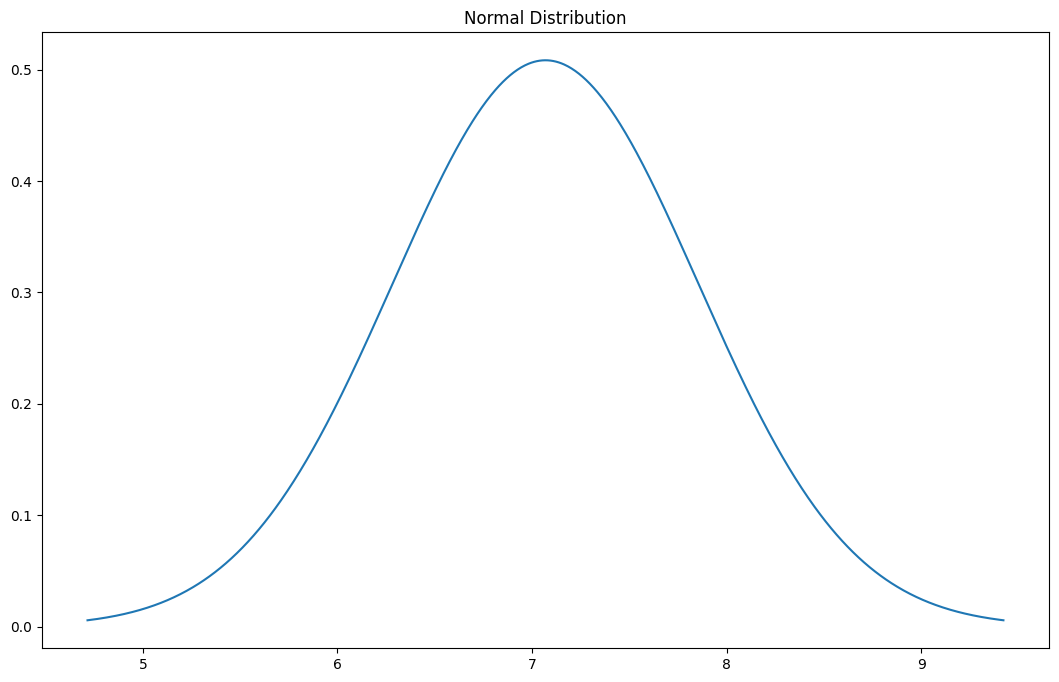

In [45]:
from scipy.stats import norm
x = np.linspace(y_mean - 3*y_std, y_mean + 3*y_std, 1000)
y = norm.pdf(x, loc=y_mean, scale=y_std)
plt.plot(x, y)
plt.title("Normal Distribution")
plt.show()

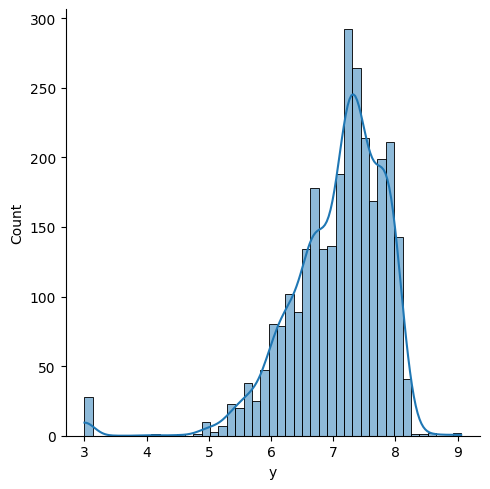

In [49]:
sns.displot(df.y, kde=True)
plt.show()

## Grubbs' Test

- **Null (H0) -** all values in the sample were drawn from a single population that follows the same normal distribution
- **Alternative (H1) -** one value in the sample was not drawn from the same normally distributed population as the other values
- If the p-value for this test is less than your significance level, you can reject the null and conclude that one of the values is an outlier

Compute ESD (The generalized extreme studentized deviate), which is used to detect one or more outliers in a univariate data set that follows an approximately normal distribution

$$G = \frac{\max_{1 \leq i \leq N} | y_i - \bar{y_i}|}{s}$$

, where $s$ is the standard deviation and $\bar{y_i}$ is the sample mean.

After that compare with calculated

$$ G > \frac{N-1}{\sqrt{N}} \sqrt{\frac{t^2_{\alpha/(2N),N-2}}{N-2+t^2_{\alpha/(2N),N-2}}} $$

In [20]:
def grubbs_test(x):
    n = len(x)
    mean_x = np.mean(x)
    sd_x = np.std(x)
    numerator = max(abs(x-mean_x))
    g_calculated = numerator/sd_x
    print("Grubbs Calculated Value:", g_calculated)
    t_value = stats.t.ppf(1 - 0.05 / (2 * n), n - 2)
    g_critical = ((n - 1) * np.sqrt(np.square(t_value))) / (np.sqrt(n) * np.sqrt(n - 2 + np.square(t_value)))
    print("Grubbs Critical Value:", g_critical)
    if g_critical > g_calculated:
        print("Using Grubbs' test we observe that calculated value is lesser than critical value. So we accept null hypothesis and conclude that there are no outliers\n")
    else:
        print("Using Grubbs' test we observe that calculated value is greater than critical value. So we reject null hypothesis and conclude that there is atleast one outlier\n")

In [50]:
var = [3.3, 6.8, 2.9, 3.8, 3.1]
grubbs_test(var)

Grubbs Calculated Value: 1.9564472370339174
Grubbs Critical Value: 1.7150373121065823
Using Grubbs' test we observe that calculated value is greater than critical value. So we reject null hypothesis and conclude that there is atleast one outlier



In [21]:
grubbs_test(df.y)

Grubbs Calculated Value: 5.187264692774663
Grubbs Critical Value: 4.2885245013490385
Using Grubbs' test we observe that calculated value is greater than critical value. So we reject null hypothesis and conclude that there is atleast one outlier



## Prophets (Time-Series)

In [22]:
def fit_predict_model(dataframe, interval_width=0.99, changepoint_range=0.8):
    m = Prophet(daily_seasonality=False, 
                yearly_seasonality=True, 
                weekly_seasonality=False, 
                seasonality_mode='additive', 
                interval_width=interval_width, 
                changepoint_range=changepoint_range)
    m = m.fit(dataframe)
    forecast = m.predict(dataframe)
    forecast['fact'] = dataframe['y'].reset_index(drop = True)
    return forecast

In [23]:
def detect_anomalies(forecast):
    forecasted = forecast[['ds','trend', 'yhat', 'yhat_lower', 'yhat_upper', 'fact']].copy()
    forecasted['anomaly'] = 0
    forecasted.loc[forecasted['fact'] > forecasted['yhat_upper'], 'anomaly'] = 1
    forecasted.loc[forecasted['fact'] < forecasted['yhat_lower'], 'anomaly'] = -1
    # anomaly importances
    forecasted['importance'] = 0
    forecasted.loc[forecasted['anomaly'] == 1, 'importance'] = (forecasted['fact'] - forecasted['yhat_upper'])/forecast['fact']
    forecasted.loc[forecasted['anomaly'] == -1, 'importance'] = (forecasted['yhat_lower'] - forecasted['fact'])/forecast['fact']
    return forecasted

In [24]:
def plot_anomalies(forecasted):
    interval = alt.Chart(forecasted).mark_area(interpolate="basis", color = '#7FC97F').encode(
    x=alt.X('ds:T',  title ='date'),
    y='yhat_upper',
    y2='yhat_lower',
    tooltip=['ds', 'fact', 'yhat_lower', 'yhat_upper']
    ).interactive().properties(
        title='Anomaly Detection'
    )

    fact = alt.Chart(forecasted[forecasted.anomaly==0]).mark_circle(size=15, opacity=0.7, color = 'Black').encode(
        x='ds:T',
        y=alt.Y('fact', title='sales'),    
        tooltip=['ds', 'fact', 'yhat_lower', 'yhat_upper']
    ).interactive()

    anomalies = alt.Chart(forecasted[forecasted.anomaly!=0]).mark_circle(size=30, color = 'Red').encode(
        x='ds:T',
        y=alt.Y('fact', title='sales'),    
        tooltip=['ds', 'fact', 'yhat_lower', 'yhat_upper'],
        size = alt.Size( 'importance', legend=None)
    ).interactive()

    return alt.layer(interval, fact, anomalies)\
              .properties(width=870, height=450)\
              .configure_title(fontSize=20)

In [25]:
pred = fit_predict_model(df)
pred = detect_anomalies(pred)
plot_anomalies(pred)

20:51:48 - cmdstanpy - INFO - Chain [1] start processing
20:51:48 - cmdstanpy - INFO - Chain [1] done processing
/home/brenus/miniconda3/envs/time-series/lib/python3.8/site-packages/altair/utils/core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


alt.LayerChart(...)

In [29]:
((pred.anomaly == 1) | (pred.anomaly == -1)).sum()

48

# REFERENCES

- [5 Ways to Find Outliers in Your Data](https://statisticsbyjim.com/basics/outliers/)
- [Guidelines for Removing and Handling Outliers in Data](https://statisticsbyjim.com/basics/remove-outliers/)
- [Outliers - Prophet](https://facebook.github.io/prophet/docs/outliers.html)
- [Anomaly detection in time series with Prophet library](https://towardsdatascience.com/anomaly-detection-time-series-4c661f6f165f)
- [GRUBBS TEST](https://www.itl.nist.gov/div898/software/dataplot/refman1/auxillar/grubtest.htm)